## EDA 

## Supplyment Sales Weekly Expanded

#### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#### Import dataset

In [2]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\temp\Supplement_Sales_Weekly_Expanded.csv")
print(df)

            Date        Product Name     Category  Units Sold  Price  Revenue  \
0     06-01-2020        Whey Protein      Protein         143  31.98  4573.14   
1     06-01-2020           Vitamin C      Vitamin         139  42.51  5908.89   
2     06-01-2020            Fish Oil        Omega         161  12.91  2078.51   
3     06-01-2020        Multivitamin      Vitamin         140  16.07  2249.80   
4     06-01-2020         Pre-Workout  Performance         157  35.47  5568.79   
...          ...                 ...          ...         ...    ...      ...   
4379  31-03-2025           Melatonin    Sleep Aid         160  47.79  7646.40   
4380  31-03-2025              Biotin      Vitamin         154  38.12  5870.48   
4381  31-03-2025   Green Tea Extract   Fat Burner         139  20.40  2835.60   
4382  31-03-2025     Iron Supplement      Mineral         154  18.31  2819.74   
4383  31-03-2025  Electrolyte Powder    Hydration         178  39.12  6963.36   

      Discount  Units Retur

In [3]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\temp\Supplement_Sales_Weekly_Expanded.csv")
df.head(3)

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,06-01-2020,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,06-01-2020,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,06-01-2020,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon


#### Data Understanding

In [4]:
# Basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB
None


In [5]:
# Use summary statistics to understand distributions.
print(df.describe())

        Units Sold        Price       Revenue     Discount  Units Returned
count  4384.000000  4384.000000   4384.000000  4384.000000     4384.000000
mean    150.200274    34.781229   5226.569446     0.124398        1.531478
std      12.396099    14.198309   2192.491946     0.071792        1.258479
min     103.000000    10.000000   1284.000000     0.000000        0.000000
25%     142.000000    22.597500   3349.372500     0.060000        1.000000
50%     150.000000    34.720000   5173.140000     0.120000        1.000000
75%     158.000000    46.712500   7009.960000     0.190000        2.000000
max     194.000000    59.970000  10761.850000     0.250000        8.000000


#### Display the first 10 rows of the dataset

In [6]:
print(df.head(10))

         Date       Product Name     Category  Units Sold  Price  Revenue  \
0  06-01-2020       Whey Protein      Protein         143  31.98  4573.14   
1  06-01-2020          Vitamin C      Vitamin         139  42.51  5908.89   
2  06-01-2020           Fish Oil        Omega         161  12.91  2078.51   
3  06-01-2020       Multivitamin      Vitamin         140  16.07  2249.80   
4  06-01-2020        Pre-Workout  Performance         157  35.47  5568.79   
5  06-01-2020               BCAA   Amino Acid         154  41.19  6343.26   
6  06-01-2020           Creatine  Performance         134  32.49  4353.66   
7  06-01-2020               Zinc      Mineral         147  46.68  6861.96   
8  06-01-2020  Collagen Peptides      Protein         147  10.96  1611.12   
9  06-01-2020          Magnesium      Mineral         134  20.76  2781.84   

   Discount  Units Returned Location Platform  
0      0.03               2   Canada  Walmart  
1      0.04               0       UK   Amazon  
2      0

#### Display the last 10 rows of the dataset

In [7]:
print(df.tail(10))

            Date        Product Name     Category  Units Sold  Price  Revenue  \
4374  31-03-2025            Creatine  Performance         174  35.63  6199.62   
4375  31-03-2025                Zinc      Mineral         147  23.47  3450.09   
4376  31-03-2025   Collagen Peptides      Protein         146  52.79  7707.34   
4377  31-03-2025           Magnesium      Mineral         138  28.45  3926.10   
4378  31-03-2025         Ashwagandha       Herbal         145  58.08  8421.60   
4379  31-03-2025           Melatonin    Sleep Aid         160  47.79  7646.40   
4380  31-03-2025              Biotin      Vitamin         154  38.12  5870.48   
4381  31-03-2025   Green Tea Extract   Fat Burner         139  20.40  2835.60   
4382  31-03-2025     Iron Supplement      Mineral         154  18.31  2819.74   
4383  31-03-2025  Electrolyte Powder    Hydration         178  39.12  6963.36   

      Discount  Units Returned Location Platform  
4374      0.03               0   Canada   Amazon  
4375  

#### Data cleaning

In [8]:
# Check whether there are any missing values
print(df.isna().sum())

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64


##### 1. Change the 'Date' column to Date format

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)


Date              datetime64[ns]
Product Name              object
Category                  object
Units Sold                 int64
Price                    float64
Revenue                  float64
Discount                 float64
Units Returned             int64
Location                  object
Platform                  object
dtype: object


C:\Users\hp\AppData\Local\Temp\ipykernel_15288\199541705.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


##### 2. change date format  %m-%d-%Y  to  %d/%m/%Y

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date'] = df['Date'].dt.strftime('%d/%m/%Y')
print(df.head(3))

         Date  Product Name Category  Units Sold  Price  Revenue  Discount  \
0  01/06/2020  Whey Protein  Protein         143  31.98  4573.14      0.03   
1  01/06/2020     Vitamin C  Vitamin         139  42.51  5908.89      0.04   
2  01/06/2020      Fish Oil    Omega         161  12.91  2078.51      0.25   

   Units Returned Location Platform  
0               2   Canada  Walmart  
1               0       UK   Amazon  
2               0   Canada   Amazon  


##### 3. What is the time range covered in the Date column?

In [11]:
print("Start Date:", df['Date'].min())
print("End Date:", df['Date'].max())

Start Date: 01/01/2024
End Date: 31/10/2022


##### 4. How many unique products are listed in Product_Name?

In [12]:
print(df['Product Name'].nunique())

16


##### 5. What are the different categories present in the Category column?

In [13]:
print(df['Category'].unique())

['Protein' 'Vitamin' 'Omega' 'Performance' 'Amino Acid' 'Mineral' 'Herbal'
 'Sleep Aid' 'Fat Burner' 'Hydration']


In [14]:
#how many unique categories there are:
print(df['Category'].nunique())

10


In [15]:
#how many products fall into each category:
print(df['Category'].value_counts())

Vitamin        822
Mineral        822
Protein        548
Performance    548
Omega          274
Amino Acid     274
Herbal         274
Sleep Aid      274
Fat Burner     274
Hydration      274
Name: Category, dtype: int64


##### 6. Are there any duplicate rows?

In [16]:
duplicates = df[df.duplicated()]
print(duplicates)
#If the output is empty, then you have no duplicates.

Empty DataFrame
Columns: [Date, Product Name, Category, Units Sold, Price, Revenue, Discount, Units Returned, Location, Platform]
Index: []


In [17]:
#Count Duplicate Rows
print(df.duplicated().sum())



0


In [18]:
#Check Duplicates Based on Specific Columns
#If you only care about duplicates in certain columns (e.g., 'Product_Name' and 'Date'):
df[df.duplicated(subset=['Product Name', 'Date'])]


,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform


In [19]:
#Remove Duplicate Rows
#To drop duplicates and keep only the first occurrence:
df = df.drop_duplicates()

##### 7. Add a new column name 'Final_Price'. (Use the equation 'Final_Price' = Price * (1-Discount))

In [20]:
df['Final_Price'] = df['Price'] * (1 - df['Discount'])
print(df.head(3))

         Date  Product Name Category  Units Sold  Price  Revenue  Discount  \
0  01/06/2020  Whey Protein  Protein         143  31.98  4573.14      0.03   
1  01/06/2020     Vitamin C  Vitamin         139  42.51  5908.89      0.04   
2  01/06/2020      Fish Oil    Omega         161  12.91  2078.51      0.25   

   Units Returned Location Platform  Final_Price  
0               2   Canada  Walmart      31.0206  
1               0       UK   Amazon      40.8096  
2               0   Canada   Amazon       9.6825  


##### 8.Which supplements have the highest total sales?

In [21]:
top_sellers = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False)
print(top_sellers.head())

Product Name
Biotin         1486798.62
Zinc           1482546.95
Pre-Workout    1477183.78
BCAA           1464819.63
Fish Oil       1451065.87
Name: Revenue, dtype: float64


##### 9. What is the average sales per supplement?

In [22]:
average_sales = df.groupby('Product Name')['Revenue'].mean()
print(average_sales)
#This will show the average revenue generated by each supplement across all weeks.

Product Name
Ashwagandha           5130.294854
BCAA                  5346.057044
Biotin                5426.272336
Collagen Peptides     5231.011825
Creatine              5228.169343
Electrolyte Powder    5153.107226
Fish Oil              5295.860839
Green Tea Extract     5258.759307
Iron Supplement       5224.753321
Magnesium             4970.724927
Melatonin             5099.692664
Multivitamin          5078.204343
Pre-Workout           5391.181679
Vitamin C             5189.773978
Whey Protein          5190.492153
Zinc                  5410.755292
Name: Revenue, dtype: float64


##### 10. Which region has the highest total sales?

In [23]:


# Group by location and sum the revenue
region_sales = df.groupby("Location")["Revenue"].sum()

# Sort to find the highest
highest_sales_region = region_sales.sort_values(ascending=False)

# Display the result
print("Total sales by region:")
print(highest_sales_region)
print("\nRegion with highest total sales:", highest_sales_region.idxmax())

Total sales by region:
Location
Canada    7848579.73
UK        7703960.34
USA       7360740.38
Name: Revenue, dtype: float64

Region with highest total sales: Canada


##### 11. What is the total revenue from all supplements?

In [24]:
# Calculate total revenue
total_revenue = df["Revenue"].sum()

# Display the result
print("Total revenue from all supplements:", total_revenue)

Total revenue from all supplements: 22913280.45


##### 12.What is the average weekly revenue per supplement?

In [25]:
# Step 1: Total revenue per supplement
total_revenue_per_product = df.groupby("Product Name")["Revenue"].sum()

# Step 2: Divide by number of weeks (3)
average_weekly_revenue = total_revenue_per_product / 3

# Display the result
print("Average weekly revenue per supplement:")
print(average_weekly_revenue.sort_values(ascending=False))

Average weekly revenue per supplement:
Product Name
Biotin                495599.540000
Zinc                  494182.316667
Pre-Workout           492394.593333
BCAA                  488273.210000
Fish Oil              483688.623333
Green Tea Extract     480300.016667
Collagen Peptides     477765.746667
Creatine              477506.133333
Iron Supplement       477194.136667
Whey Protein          474064.950000
Vitamin C             473999.356667
Electrolyte Powder    470650.460000
Ashwagandha           468566.930000
Melatonin             465771.930000
Multivitamin          463809.330000
Magnesium             453992.876667
Name: Revenue, dtype: float64


##### 13.Which supplement generated the most revenue in a single week?

In [26]:
# Group by Date and Product Name, then sum revenue
weekly_product_revenue = df.groupby(["Date", "Product Name"])["Revenue"].sum()

# Find the entry with the highest revenue
max_revenue_entry = weekly_product_revenue.idxmax()
max_revenue_value = weekly_product_revenue.max()

# Display the result
print(f"Highest single-week revenue was generated by '{max_revenue_entry[1]}' on {max_revenue_entry[0]}")
print(f"Revenue: {max_revenue_value}")

Highest single-week revenue was generated by 'Whey Protein' on 14/11/2022
Revenue: 10761.85


##### 14.Are there any outliers in Revenue, Units Sold, or Discount? (Use boxpot)

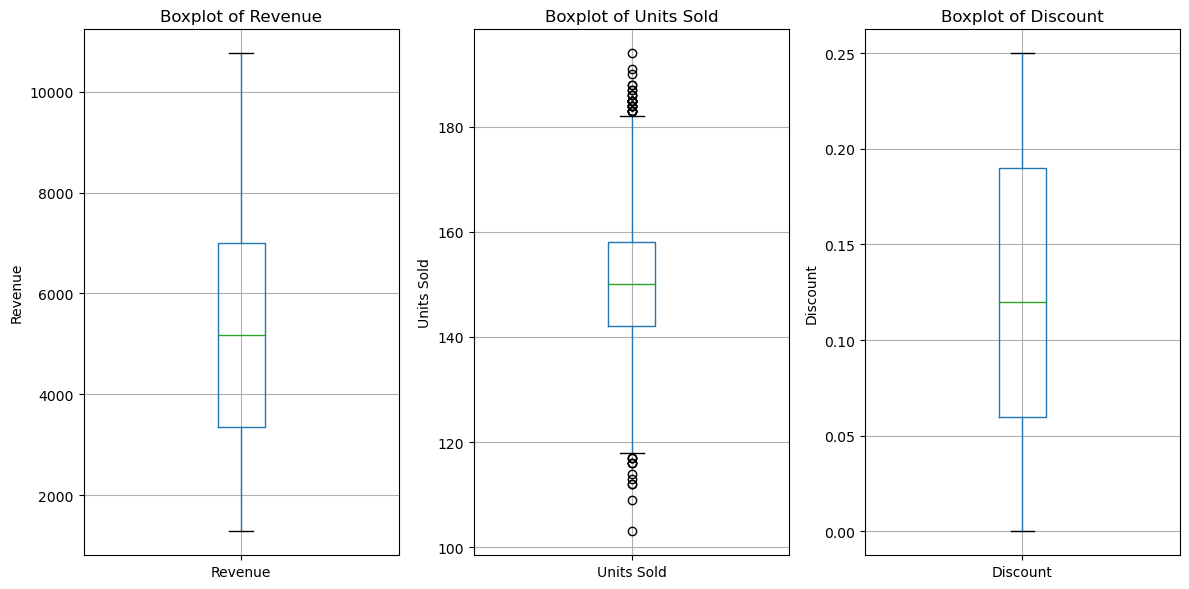

In [27]:
# Set up the figure
plt.figure(figsize=(12, 6))

# Create boxplots for each column
for i, column in enumerate(['Revenue', 'Units Sold', 'Discount'], 1):
    plt.subplot(1, 3, i)
    df.boxplot(column=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

##### 1. Boxplot of Revenue
- What it shows: The spread of revenue values across all sales entries.
- Interpretation:
- The box represents the middle 50% of revenue values (between Q1 and Q3).
- The green line inside the box is the median revenue.
- The whiskers extend to the minimum and maximum values within 1.5×IQR.
- ✅ No visible outliers: This suggests revenue values are relatively consistent, with no extreme spikes or dips.

##### 2. Boxplot of Units Sold
- What it shows: How many units were sold per transaction.
- Interpretation:
- The box and whiskers follow the same logic as above.
- ⚠️ Outliers above the upper whisker: These are unusually high unit sales—perhaps bulk purchases or promotional spikes.
- You might want to investigate these rows to see which products or platforms drove those high-volume sales.

##### 3. Boxplot of Discount
- What it shows: The discount applied to each sale.
- Interpretation:
- The median discount is visible, and the spread is fairly tight.
- ⚠️ Outliers below the lower whisker: These are unusually low discounts—possibly full-price sales or errors in discount entry.
- Could be worth checking if these rows align with premium products or specific platforms like Amazon or iHerb.




## Useing visualization techniques 

##### 1.What are the top 5 best-selling products by total Units Sold? 

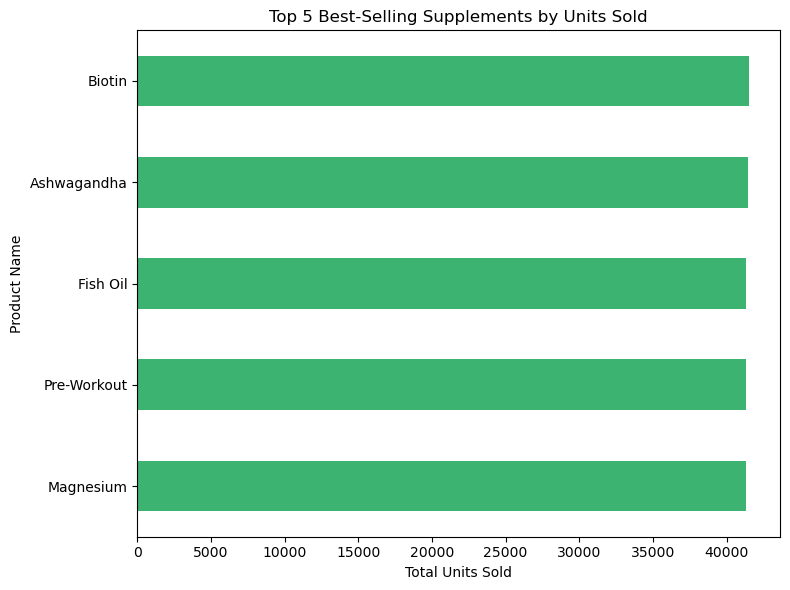

In [28]:


# Group by product and sum units sold
top_products = df.groupby("Product Name")["Units Sold"].sum().sort_values(ascending=False).head(5)

# Plot horizontal bar chart
plt.figure(figsize=(8, 6))
top_products.plot(kind='barh', color='mediumseagreen')
plt.title("Top 5 Best-Selling Supplements by Units Sold")
plt.xlabel("Total Units Sold")
plt.ylabel("Product Name")
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()

##### 2.Total Revenue by Category

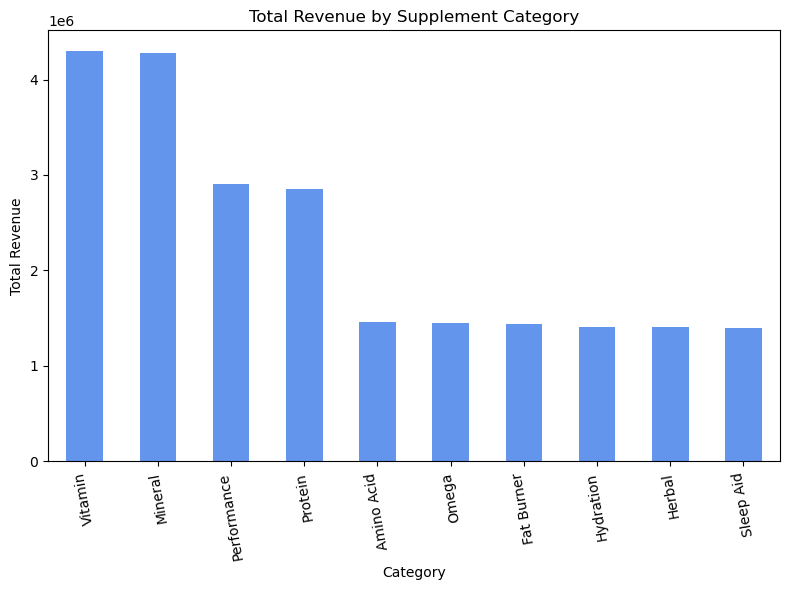

In [29]:


# Group by category and sum revenue
category_revenue = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8, 6))
category_revenue.plot(kind='bar', color='cornflowerblue')
plt.title("Total Revenue by Supplement Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=100)
plt.tight_layout()
plt.show()

##### 3.Trend of Units Sold Over Time

C:\Users\hp\AppData\Local\Temp\ipykernel_15288\2242515097.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


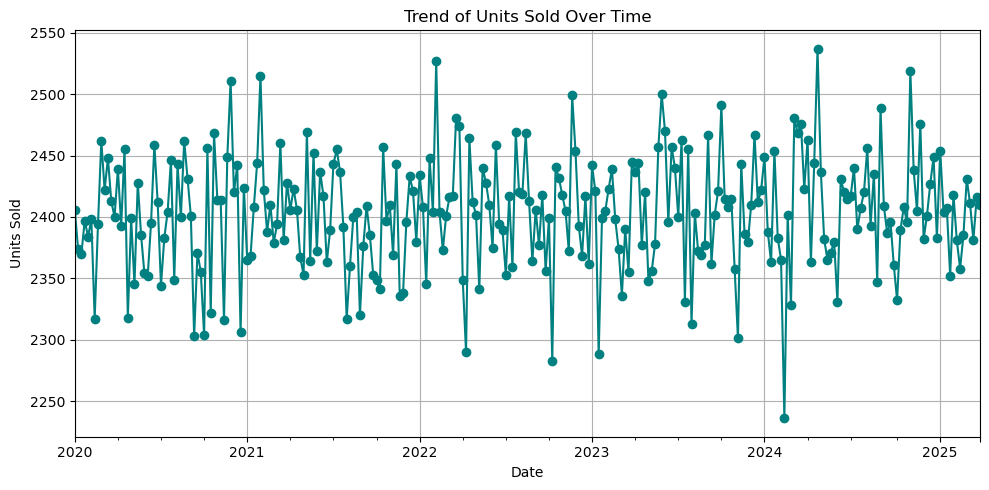

In [30]:
# Convert 'Date' to datetime format (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and sum units sold
units_over_time = df.groupby("Date")["Units Sold"].sum()

# Plot the trend
plt.figure(figsize=(10, 5))
units_over_time.plot(kind='line', marker='o', color='teal')
plt.title("Trend of Units Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 4.Return Rate by Product

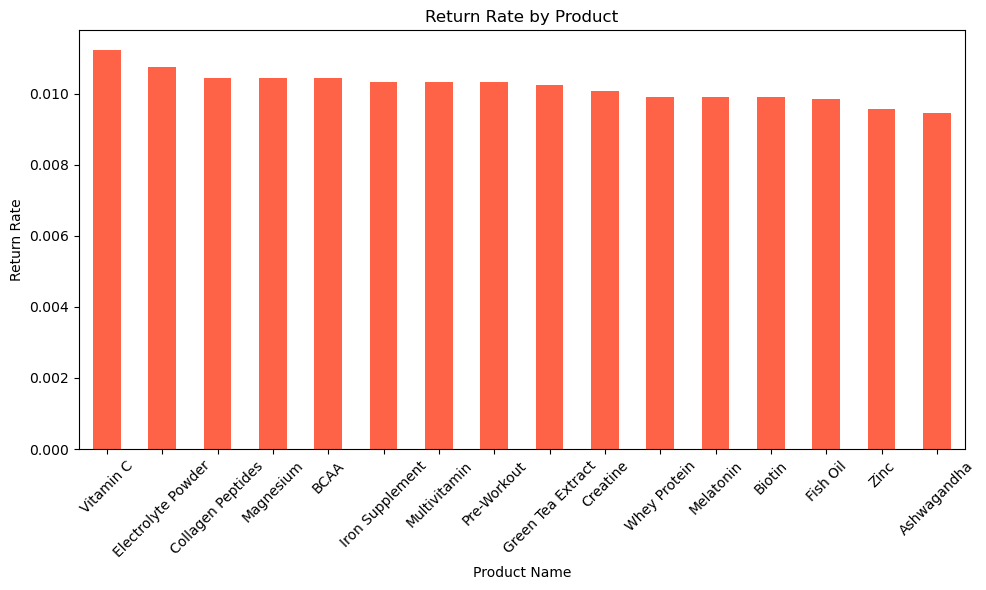

In [31]:
# Calculate return rate per product
product_returns = df.groupby("Product Name")[["Units Returned", "Units Sold"]].sum()
product_returns["Return Rate"] = product_returns["Units Returned"] / product_returns["Units Sold"]

# Sort by return rate
sorted_returns = product_returns["Return Rate"].sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
sorted_returns.plot(kind='bar', color='tomato')
plt.title("Return Rate by Product")
plt.xlabel("Product Name")
plt.ylabel("Return Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 5.Create a Demand Forecast Column

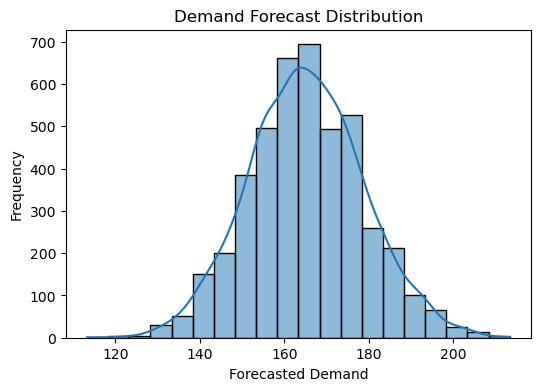

In [32]:
# Create a simple forecast based on Units Sold and a multiplier
df['Demand Forecast'] = df['Units Sold'] * 1.1  # assuming 10% expected growth

# Now plot
plt.figure(figsize=(6,4))
sns.histplot(df['Demand Forecast'], bins=20, kde=True)
plt.title('Demand Forecast Distribution')
plt.xlabel('Forecasted Demand')
plt.ylabel('Frequency')
plt.show()

#### 6. Product Performance Across Categories



C:\Users\hp\AppData\Local\Temp\ipykernel_15288\555039522.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Revenue', estimator='sum', ci=None)


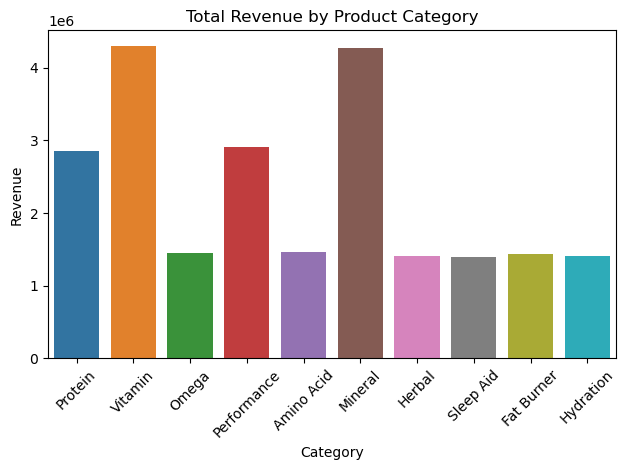

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='Category', y='Revenue', estimator='sum', ci=None)
plt.title('Total Revenue by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#This shows which categories (e.g., Protein, Omega)
#  are driving the most revenue.

#### 7. Sales Trends Across Platforms

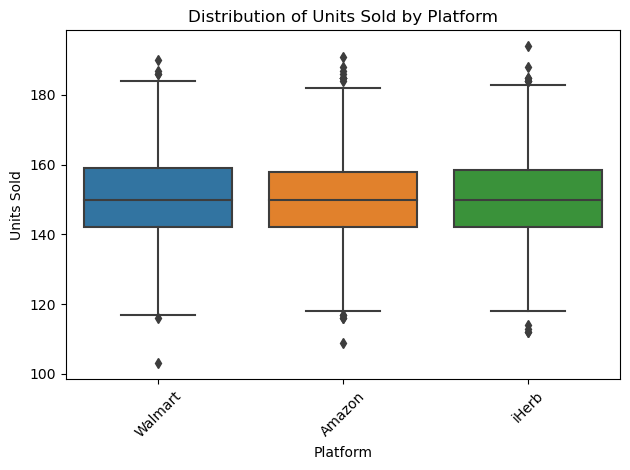

In [34]:
sns.boxplot(data=df, x='Platform', y='Units Sold')
plt.title('Distribution of Units Sold by Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 8.Seasonal Patterns in Units Sold


C:\Users\hp\AppData\Local\Temp\ipykernel_15288\2159971036.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Month', y='Units Sold', estimator='sum', ci=None)


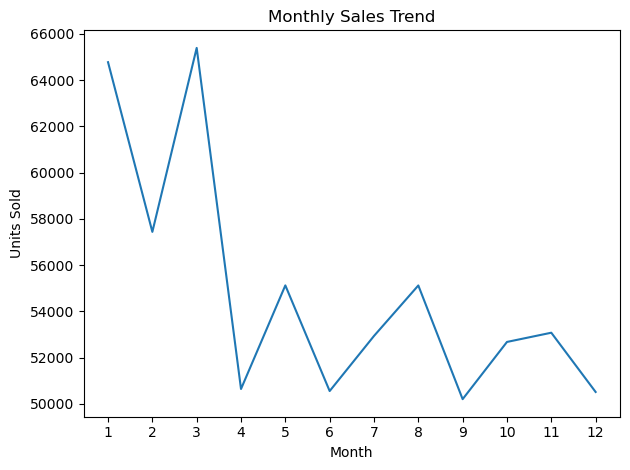

In [35]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

sns.lineplot(data=df, x='Month', y='Units Sold', estimator='sum', ci=None)
plt.title('Monthly Sales Trend')
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

#This reveals if certain months consistently see higher sales.



**Conclusion:**  
The exploratory data analysis of the *Supplement_Sales_Weekly_Expand* dataset reveals key insights into product performance, pricing strategies, and customer behavior across platforms and regions. High-revenue products tend to cluster in the Protein and Performance categories, with Amazon and iHerb emerging as dominant sales platforms. Seasonal trends and discount patterns significantly influence units sold and returns. These findings provide a strong foundation for targeted marketing, inventory planning, and strategic pricing decisions.


